In [50]:
### draw a venn gram documenting overlaps between data drug sensitivity, gene essentiality and mRNA data

In [3]:
from matplotlib_venn import venn3, venn2
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

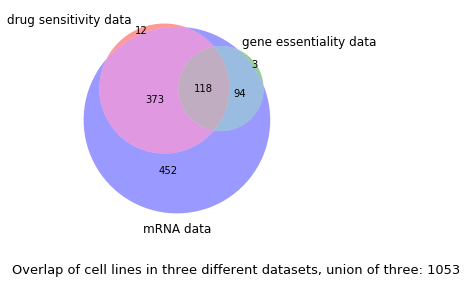

In [7]:
# Overlap between cell lines

sensitivity_file = "../psl/data/first_model/sensitive_truth.txt"
essentiality_file = "../psl/data/first_model/essential.txt"
mRNA_file = "../psl/data/first_model/active.txt"

sensitive_df = pd.read_csv(sensitivity_file, delimiter="\t", header=None)
sensitive_set = set(sensitive_df[0])

essential_df = pd.read_csv(essentiality_file, delimiter="\t", header=None)
essential_set = set(essential_df[0])

active_df = pd.read_csv(mRNA_file, delimiter="\t", header=None)
active_set = set(active_df[0])

labels = ["drug sensitivity data", "gene essentiality data", "mRNA data"]
venn3(subsets=[sensitive_set, essential_set, active_set], set_labels=labels)
plt.text(-1, -1, "Overlap of cell lines in three different datasets, union of three: 1053", fontsize=13)
plt.savefig("../plots/cell_line_venn.png", dpi=200, bbox_inches='tight')

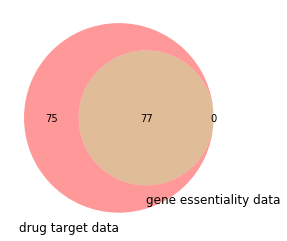

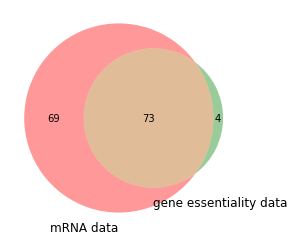

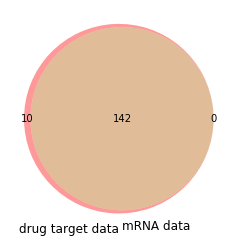

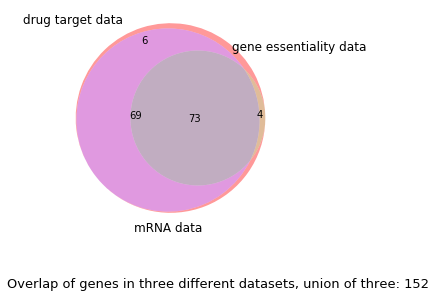

In [72]:
# Overlap between Genes

drug_target_file = "../psl/data/first_model/drug_target.txt"
drug_target_df = pd.read_csv(drug_target_file, delimiter="\t", header=None)
gene_target_set = set(drug_target_df[1])
essential_gene_set = set(essential_df[1])
active_gene_set = set(active_df[1])
plt.figure(1)
venn2(subsets=[gene_target_set, essential_gene_set], set_labels=["drug target data", "gene essentiality data"])
plt.figure(2)
venn2(subsets=[active_gene_set, essential_gene_set], set_labels=["mRNA data", "gene essentiality data"])
plt.figure(3)
venn2(subsets=[gene_target_set, active_gene_set], set_labels=["drug target data", "mRNA data"])

plt.figure(4)
labels = ["drug target data", "gene essentiality data", "mRNA data"]
venn3(subsets=[gene_target_set, essential_gene_set, active_gene_set], set_labels=labels)
plt.text(-1, -1, "Overlap of genes in three different datasets, union of three: 152", fontsize=13)
plt.savefig("../plots/gene_venn.png", dpi=200, bbox_inches='tight')

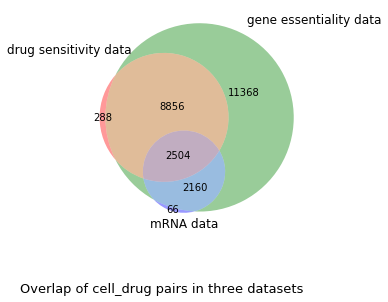

In [20]:
# Overlap between cell-drug pairs

def get_gene_drug_dict():
    drug_target_file = "../psl/data/first_model/drug_target.txt"
    drug_target_df = pd.read_csv(drug_target_file, delimiter="\t", header=None)
    drug_target_dict = {}
    for index, row in drug_target_df.iterrows():
        if row[1] in drug_target_dict.keys():
            drug_target_dict[row[1]].append(row[0])
        else:
            drug_target_dict[row[1]] = [row[0]]
    return drug_target_dict


def get_active_cell_drug_set(gene_drug_dict):
    active_cell_drug_pairs = []
    for index, row in active_df.iterrows():
        if row[1] in gene_drug_dict.keys():
            for drug in gene_drug_dict[row[1]]:
                active_cell_drug_pairs.append(row[0] + drug)
    return set(active_cell_drug_pairs)


def get_essential_cell_drug_set(gene_drug_dict):
    cell_drug_pairs = []
    for index, row in essential_df.iterrows():
        if row[1] in gene_drug_dict.keys():
            for drug in gene_drug_dict[row[1]]:
                cell_drug_pairs.append(row[0] + drug)
    return set(cell_drug_pairs)
    
def get_sensitive_cell_drug_set():
    cell_drug_pairs = []
    for index, row in sensitive_df.iterrows():
        cell_drug_pairs.append(row[0] + row[1])
    return set(cell_drug_pairs)
    
    

gene_drug_dict = get_gene_drug_dict()
active_cell_drug_set = get_active_cell_drug_set(gene_drug_dict)
essential_cell_drug_set = get_essential_cell_drug_set(gene_drug_dict)
sensitive_cell_drug_set = get_sensitive_cell_drug_set()
venn3(subsets=[sensitive_cell_drug_set, active_cell_drug_set, essential_cell_drug_set], 
      set_labels=["drug sensitivity data", "gene essentiality data", "mRNA data"])
plt.text(-1, -1, "Overlap of cell_drug pairs in three datasets", fontsize=13)
plt.savefig("../plots/cell_drug_venn.png", dpi=200, bbox_inches='tight')
